In [1]:
# libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("diamond.csv")
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


# Data preparation

In [4]:
#isolate X and Y
y = df.price
X = df.carat

In [6]:
# Adding constant
#beuracracy, have to do it
X = sm.add_constant(X)
X.head()

,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


# Simple Linear Regression

In [7]:
# Regression model
model1 = sm.OLS(endog=y,exog=X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          3.04e-150
Time:                        09:19:41   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'Price')

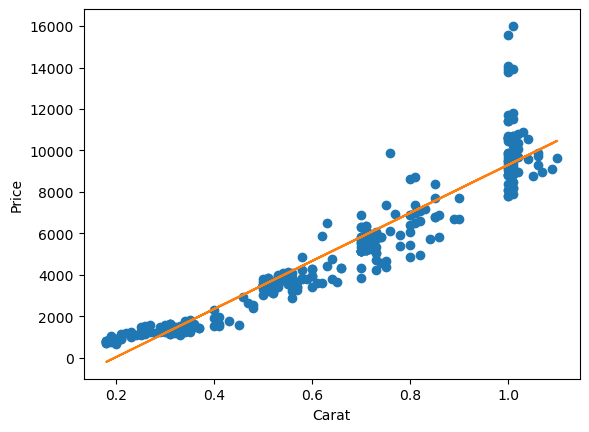

In [9]:
#plotting
X = df.carat
plt.plot(X,y,"o")
b,a = np.polyfit(X,y,1)
plt.plot(X,b*X+a)
plt.xlabel("Carat")
plt.ylabel("Price")

## Linear Regression with dummy variable

In [10]:
# look at carat variable
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [12]:
#create binary variable
df["carat_binary"]=np.where(df.carat>0.6,1,0)
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [14]:
#challenge: create linear regression with binary variable and plot
X=df["carat_binary"]
X=sm.add_constant(X)


,const,carat_binary
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
303,1.0,1
304,1.0,1
305,1.0,1
306,1.0,1


In [15]:
model2 = sm.OLS(endog=y,exog=X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.79e-73
Time:                        09:32:20   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

Text(0, 0.5, 'Price')

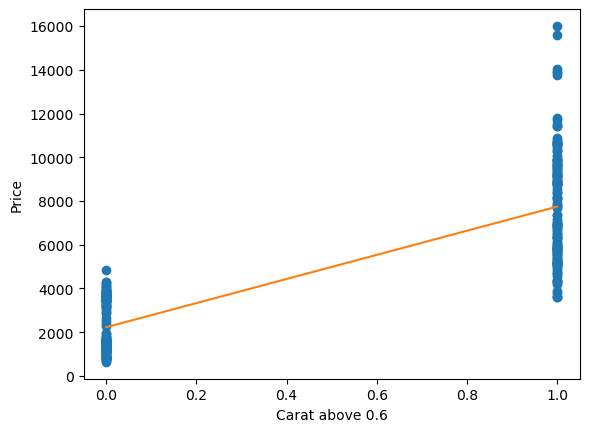

In [17]:
X = df["carat_binary"]
plt.plot(X,y,"o")
b,a = np.polyfit(X,y,1)
plt.plot(X,b*X+a)
plt.xlabel("Carat above 0.6")
plt.ylabel("Price")

# Multilinear Regression

In [21]:
df = pd.read_csv("salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


## Analyzing data

In [20]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


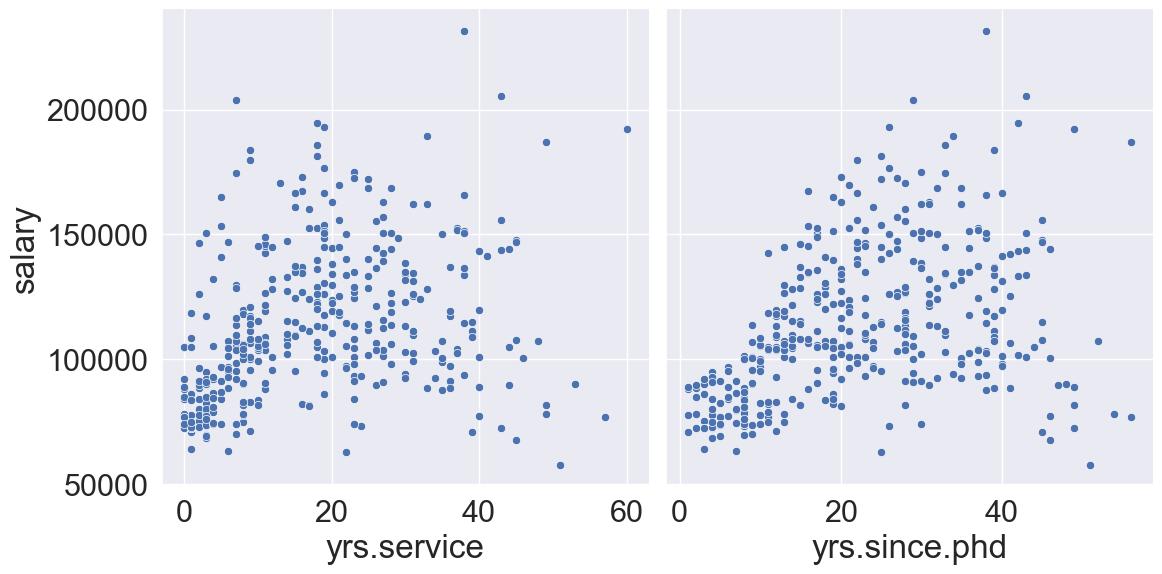

In [26]:
# plotting continuous IV agaisnt dependent variable to check for outliers
sns.set(font_scale=2)
sns.pairplot(data=df,
             y_vars=["salary"],
             x_vars=["yrs.service","yrs.since.phd"],
             height = 6)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3000\2892687256.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

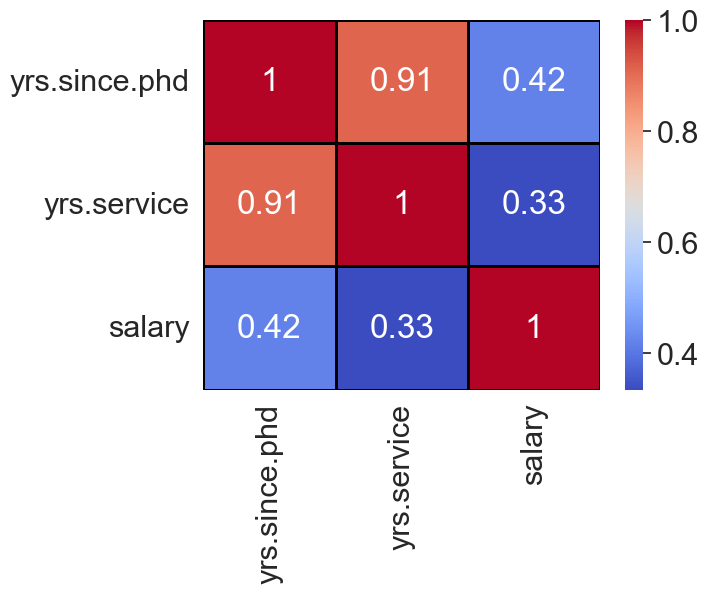

In [27]:
#correlation matrix
sns.heatmap(df.corr(),
            annot=True,
            fmt=".2g",
            cmap="coolwarm",
            linewidths=1,
            linecolor="black")

In [29]:
#categorical variables
df["rank"].value_counts()
df.select_dtypes(include="object").value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [33]:
# for loop categorical variables
categorical = df.select_dtypes(include="object")
for cat in categorical:
    print(df[cat].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [34]:
df.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750


In [35]:
# transform objects into dummies
df = pd.get_dummies(data=df,drop_first=True)
df.head(1)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1


## Multilinear regression preparation

In [38]:
#isolate X and y
y = df.salary/1000
X = df.drop(columns=["salary","yrs.service"])
X.head(1)


,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [39]:
# Add a constant
X = sm.add_constant(X)
X.head(1)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1


In [55]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,
                                              random_state=1502)
X_train.head(1)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1


## Multilinear regression

In [56]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.65e-41
Time:                        10:41:08   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

## Accuracy Assessment

In [57]:
#predict
predictions = model.predict(X_test)
predictions[:4]

364    118.590061
30     134.868270
378    118.731635
188     99.876615
dtype: float64

In [58]:
#Accuracy assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:",round(mean_absolute_error(y_test,predictions),1))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,predictions)),1))

MAE: 18.2
RMSE: 25.8


# Logistic Regression

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


## Data Analysis

In [3]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


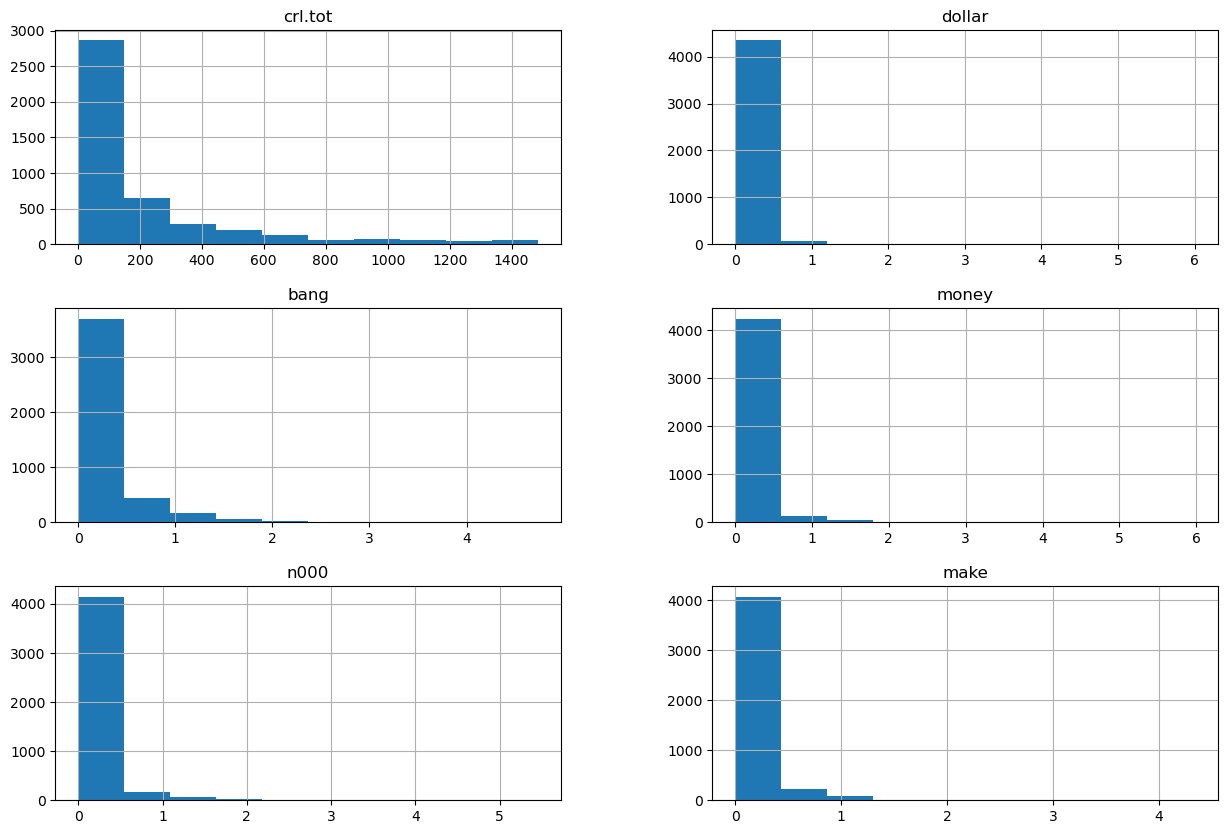

In [14]:
#histograms
df.hist(figsize=(15,10));

In [13]:
#removing outliers
print(len(df))
df=df[df["crl.tot"]<1500]
df=df[df["bang"]<5]
df=df[df["money"]<6]
print(len(df))

4439
4432


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_10092\3676637542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

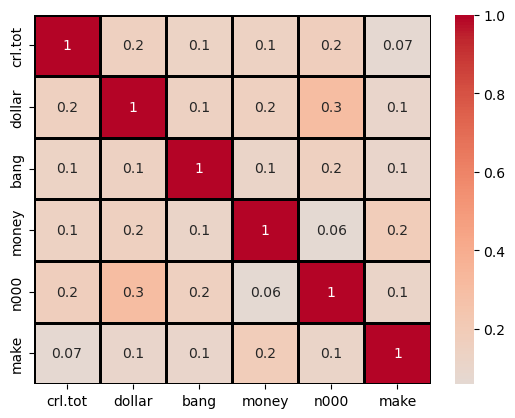

In [15]:
# Correlation matrix
sns.heatmap(df.corr(),
            annot=True,
            fmt=".1g",
            cmap="coolwarm",
            center=0,
            linewidths=1,
            linecolor="black")

## Logistic regression preparartion

In [16]:
#Prepare dependent variable
df["yesno"]=np.where(df["yesno"]=="y",1,0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


In [19]:
#Prepare the X and y
y=df.yesno
X=df.iloc[:,:-1]
X=sm.add_constant(X)
X

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21
3,1.0,191,0.00,0.137,0.00,0.00,0.00
4,1.0,191,0.00,0.135,0.00,0.00,0.00
5,1.0,54,0.00,0.000,0.00,0.00,0.00
...,...,...,...,...,...,...,...
4596,1.0,88,0.00,0.000,0.00,0.00,0.31
4597,1.0,14,0.00,0.353,0.00,0.00,0.00
4598,1.0,118,0.00,0.000,0.00,0.00,0.30
4599,1.0,78,0.00,0.000,0.00,0.00,0.96


In [20]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,
                                              random_state=1502)
X_train.head(1)

,const,crl.tot,dollar,bang,money,n000,make
988,1.0,276,0.0,0.13,0.54,0.0,0.0


## Logistic Regression

In [23]:
model = sm.Logit(y_train,X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.4210
Time:                        16:10:21   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [26]:
#Create the function
def logistic_reader(coefficient):
    probability=round((np.exp(coefficient)-1)*100,2)
    if probability>0:
        print("The likelihood increases by",probability,"%")
    elif probability==0:
        print("no impact")
    else:
        print("The likelihood decreases by",probability,"%")

In [29]:
logistic_reader(0.1)

The likelihood increases by 10.52 %


## Asses the model

In [33]:
#Predictions
predictions= model.predict(X_test)
predictions=np.where(predictions>0.5,1,0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [34]:
#check if dataset is balanced
y_test.mean()

0.35400225479143177

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
tn,fp,fn,tp=confusion_matrix(y_test,predictions).ravel()

[[524  49]
 [102 212]]


In [38]:
fn

102

In [39]:
#Accuracy
accuracy=(tp+tn) / (tp+tn+fp+fn)
print("Accuracy:",round(accuracy*100,1),"%")

Accuracy: 83.0 %


In [41]:
#F1_score
f1 = 2*tp / (2*tp +fn+fp)
print("F1_score:",round(f1*100,1),"%")

F1_score: 73.7 %


In [43]:
#Specifity
specifity = tn/(tn+fp)
print("Specifity:",round(specifity*100,1),"%")

Specifity: 91.4 %


In [44]:
#sensitivity
sensetivity = tp/(tp+fn)
print("sensetivity:",round(sensetivity*100,1),"%")

sensetivity: 67.5 %


In [45]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

